In [42]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
from run_assessment import modeller_score, developer_score
import cPickle
import itertools 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [43]:
def load_pickle(filename):
    with open(filename, 'r') as fin:
        ret = cPickle.load(fin)
    return ret

def compute_score(ground_truth, alignment, metric):
    if alignment is None:
        return None
    keys = ground_truth.keys()
    scores = []
    for id_a, id_b in itertools.permutations(keys, 2):
        struct_align = [ground_truth[id_a], ground_truth[id_b]]
        seq_align = [alignment[id_a], alignment[id_b]]
        try:
            scores.append(metric(struct_align, seq_align))
        except ZeroDivisionError:
            return None
    return np.mean(scores)

def compute_score_batch(ground_truths, alignments, metric):
    scores = [compute_score(g, a, metric) for g, a in zip(ground_truths, alignments)]
    return scores

In [44]:
pasta = load_pickle('../result/pasta.pickle')
mafft = load_pickle('../result/mafft.pickle')
# baliphy = load_pickle('../result/baliphy.pickle')
baliphy = load_pickle('../result/baliphy_24h.pickle')
ground_truth = load_pickle('../result/ground_truth.pickle')

In [45]:
pasta_scores = compute_score_batch(ground_truth, pasta, developer_score)

In [46]:
baliphy_scores = compute_score_batch(ground_truth, baliphy, developer_score)

In [47]:
mafft_scores = compute_score_batch(ground_truth, mafft, developer_score)

In [48]:
mask = []
for a, b, c in zip(pasta_scores, baliphy_scores, mafft_scores):
    mask.append(a is not None and b is not None and c is not None)

In [49]:
pasta_scores = [y for x, y in zip(mask, pasta_scores) if x]
baliphy_scores = [y for x, y in zip(mask, baliphy_scores) if x]
mafft_scores = [y for x, y in zip(mask, mafft_scores) if x]

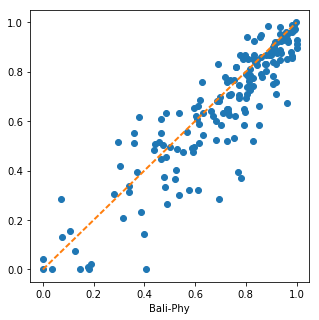

In [50]:
plt.plot(pasta_scores, baliphy_scores, 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)
plt.xlabel('Bali-Phy', )

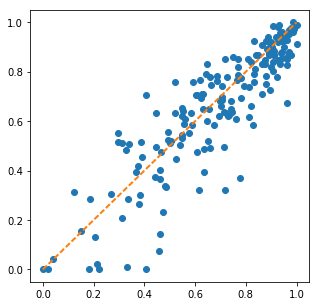

In [51]:
plt.plot(mafft_scores, baliphy_scores, 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)

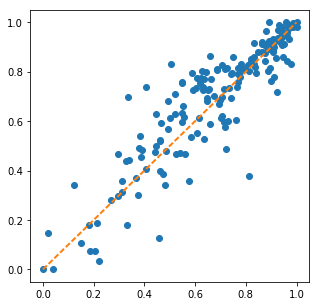

In [52]:
plt.plot(mafft_scores, pasta_scores, 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)

In [53]:
print(np.mean(baliphy_scores))
print(np.mean(mafft_scores))
print(np.mean(pasta_scores))

0.661968865293
0.688200677725
0.707083695725


In [54]:
print(np.median(baliphy_scores))
print(np.median(mafft_scores))
print(np.median(pasta_scores))

0.708333333333
0.72
0.774630541872


In [55]:
print(scipy.stats.pearsonr(baliphy_scores, mafft_scores))
print(scipy.stats.pearsonr(baliphy_scores, pasta_scores))
print(scipy.stats.pearsonr(mafft_scores, pasta_scores))

(0.88035748437763806, 3.1269926671384959e-59)
(0.89958146161205488, 1.3947147592062659e-65)
(0.90289897121185569, 8.2938074894781881e-67)


In [56]:
print(scipy.stats.ttest_rel(baliphy_scores, mafft_scores))
print(scipy.stats.ttest_rel(baliphy_scores, pasta_scores))
print(scipy.stats.ttest_rel(mafft_scores, pasta_scores))

Ttest_relResult(statistic=-2.8954648216701826, pvalue=0.0042603491284124327)
Ttest_relResult(statistic=-5.412380039269058, pvalue=1.9888885553075395e-07)
Ttest_relResult(statistic=-2.3918811807752141, pvalue=0.0178040805933848)


In [57]:
print(scipy.stats.ranksums(baliphy_scores, mafft_scores))
print(scipy.stats.ranksums(baliphy_scores, pasta_scores))
print(scipy.stats.ranksums(mafft_scores, pasta_scores))

RanksumsResult(statistic=-0.98717063053449561, pvalue=0.32355899703690649)
RanksumsResult(statistic=-1.7915129704681896, pvalue=0.073211015084158101)
RanksumsResult(statistic=-0.87481804971836052, pvalue=0.38167291455284447)


(array([  8.,   1.,   2.,   1.,   2.,   3.,   7.,   5.,   3.,   8.,  11.,
          8.,  17.,  10.,  11.,  16.,  14.,  22.,  16.,  14.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

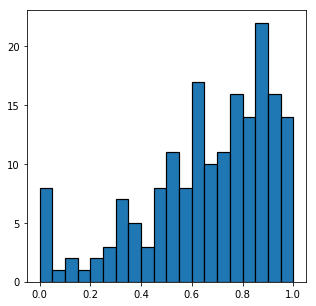

In [58]:
plt.hist(baliphy_scores, 20, edgecolor='black', linewidth=1.2)

(array([  3.,   0.,   1.,   3.,   3.,   3.,   6.,   6.,   5.,  10.,   9.,
          8.,  14.,  10.,  15.,  10.,  12.,  17.,  27.,  17.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

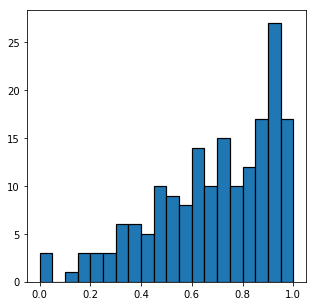

In [59]:
plt.hist(mafft_scores, 20, edgecolor='black', linewidth=1.2)

(array([  3.,   2.,   3.,   3.,   0.,   2.,   4.,   6.,   3.,  11.,   5.,
          7.,  10.,   9.,  13.,  17.,  21.,  15.,  23.,  22.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

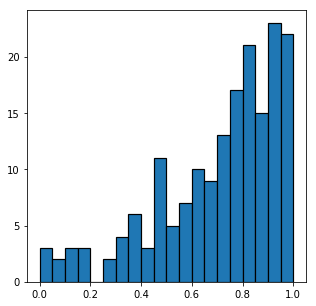

In [60]:
plt.hist(pasta_scores, 20, edgecolor='black', linewidth=1.2)

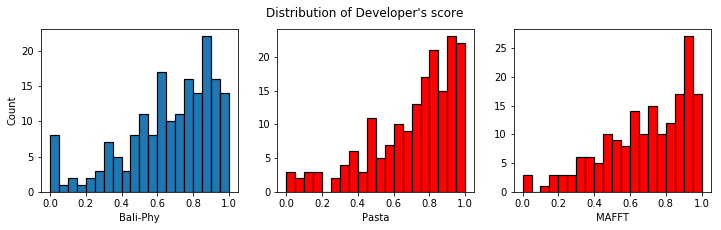

In [61]:
pylab.rcParams['figure.figsize'] = (12, 3)
fig = plt.figure()
fig.suptitle("Distribution of Developer's score", fontsize=12)
plt.subplot(1, 3, 1)
plt.hist(baliphy_scores, 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Bali-Phy')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(pasta_scores, 20, color='r', edgecolor='black', linewidth=1.2)
plt.xlabel('Pasta')

plt.subplot(1, 3, 3)x
plt.hist(mafft_scores, 20,  color='r', edgecolor='black', linewidth=1.2)
plt.xlabel('MAFFT')

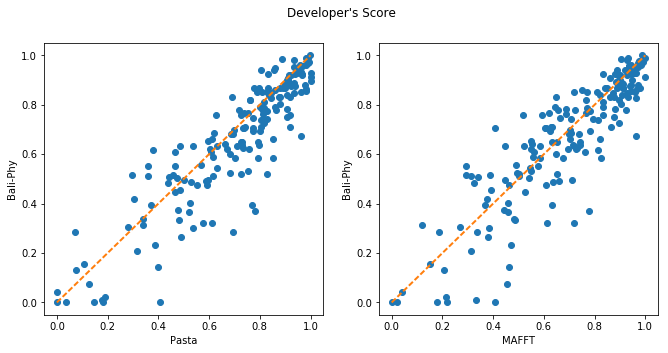

In [62]:
pylab.rcParams['figure.figsize'] = (11, 5)
fig = plt.figure()
fig.suptitle("Developer's Score", fontsize=12)
plt.subplot(1, 2, 1)
plt.plot(pasta_scores, baliphy_scores, 'o')
plt.xlabel('Pasta')
plt.ylabel('Bali-Phy')

plt.plot([0, 1], [0, 1], '--',linewidth=2.0)
plt.subplot(1, 2, 2)
plt.plot(mafft_scores, baliphy_scores, 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)
plt.xlabel('MAFFT')
plt.ylabel('Bali-Phy')
